In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [142]:
csvfile = "creditcard.csv"
df = pd.read_csv(csvfile)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df1 = df

In [4]:
counts = df['Class'].value_counts()
counts

0    284315
1       492
Name: Class, dtype: int64

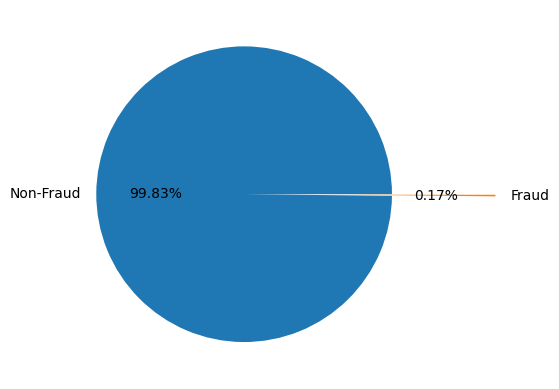

In [5]:
# plot a pie chart with labels 0 and 1
plt.pie(counts, labels = ['Non-Fraud', 'Fraud'], autopct='%1.2f%%', explode = (0, 0.7))
plt.show()

# Time 변수 시간당 그룹으로 나누기

In [6]:
max(df['Time'])

172792.0

In [62]:
col_list = list(df.columns)
col_list

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class',
 'Time_group']

In [61]:
type(col_list)

pandas.core.indexes.base.Index

In [145]:
bins = list(range(int(min(df['Time'])), int(max(df['Time'])) + 9, 3600))
df['Time_group'] = pd.cut(df['Time'], bins, right = False, labels = list(range(1, 49, 1)))

In [147]:
# 조건부 확률의 분모
df['Time_group'].value_counts()

22    9895
21    8980
23    8977
41    8667
40    8625
19    8607
39    8541
12    8517
43    8432
36    8339
35    8310
11    8288
42    8284
15    8029
20    7994
34    7960
18    7882
10    7878
16    7836
46    7808
17    7786
38    7780
45    7776
13    7732
37    7688
44    7655
14    7585
47    6464
24    6082
9     5179
33    5097
48    4856
1     3963
32    3875
25    3732
8     3368
31    2270
2     2217
26    2003
7     1831
4     1821
27    1752
6     1681
28    1671
3     1576
30    1309
29    1127
5     1082
Name: Time_group, dtype: int64

In [149]:
# 조건부 확률의 분자
df['Time_group'][df.Class == 1].value_counts()

12    43
27    36
8     23
3     21
43    18
42    17
24    17
29    17
10    15
19    15
22    14
16    14
17    14
15    13
4     13
40    12
18    12
44    12
6     11
39    10
36    10
45    10
14     9
13     9
21     8
37     8
26     8
41     8
38     8
20     7
31     6
47     6
5      6
35     6
9      5
25     4
48     4
33     4
28     4
23     3
7      3
2      2
11     2
46     2
1      2
34     1
32     0
30     0
Name: Time_group, dtype: int64

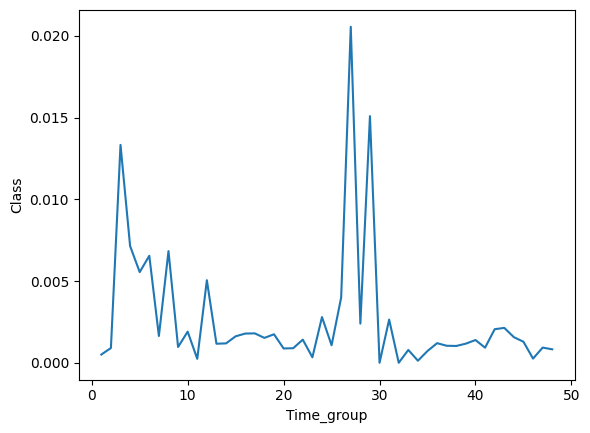

In [150]:
# 조건부 확률 구현
sns.lineplot(df.groupby('Time_group')['Class'].mean());

In [159]:
df.groupby('Time_group')['Class'].mean()

0.13088609445369803

x축이 시간, y축이 각 변수. 한 그래프에 전체 선, class = 1일 때 선이랑 같이 그리기기.

<Axes: >

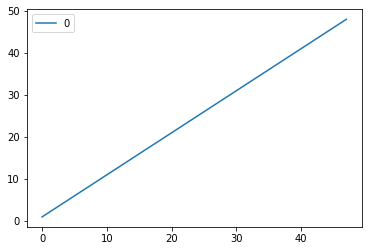

In [148]:
sns.lineplot(df.groupby('Time_group')['Class'])

In [167]:
col_list = df.columns

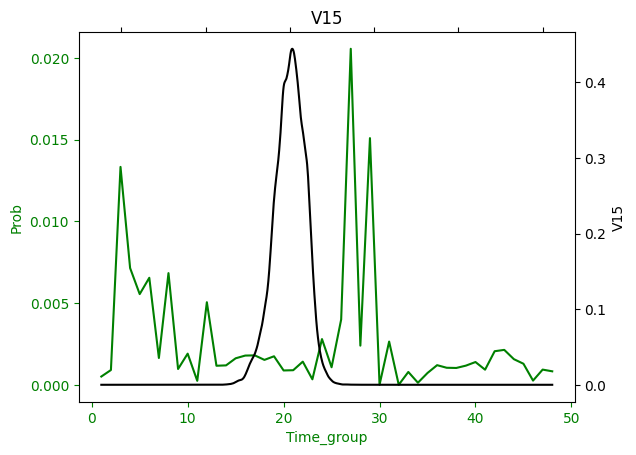

In [191]:
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax.set_title("V15")
ax.plot(range(1,49),df.groupby('Time_group')['Class'].mean(), color="g")
ax.set_xlabel("Time_group", color="g")
ax.set_ylabel("Prob", color="g")
ax.tick_params(axis='x', colors="g")
ax.tick_params(axis='y', colors="g")

ax2 = df["V15"].plot(kind = "kde", color = 'k')
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
#ax2.set_xlabel('Time', color="k") 
ax2.set_ylabel("V15", color="k")       
#ax2.xaxis.set_label_position('top') 
ax2.axes.xaxis.set_ticklabels([])  
ax2.yaxis.set_label_position('right') 
#ax2.tick_params(axis='x', colors="k")
ax2.tick_params(axis='y', colors="k")
plt.show()

In [ ]:
for col in col_list.drop("Time"):
    fig=plt.figure()
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)
    ax.set_title(col)
    ax.plot(range(1,49),df.groupby('Time_group')['Class'].mean(), color="g")
    ax.set_xlabel("Time_group", color="C0")
    ax.set_ylabel("Prob", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    ax2 = df[col].plot(color = 'k')
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    #ax2.set_xlabel('Time', color="C1") 
    ax2.set_ylabel(col, color="C1")       
    #ax2.xaxis.set_label_position('top') 
    ax2.axes.xaxis.set_ticklabels([])  
    ax2.yaxis.set_label_position('right') 
    #ax2.tick_params(axis='x', colors="C1")
    ax2.tick_params(axis='y', colors="C1")

plt.show()

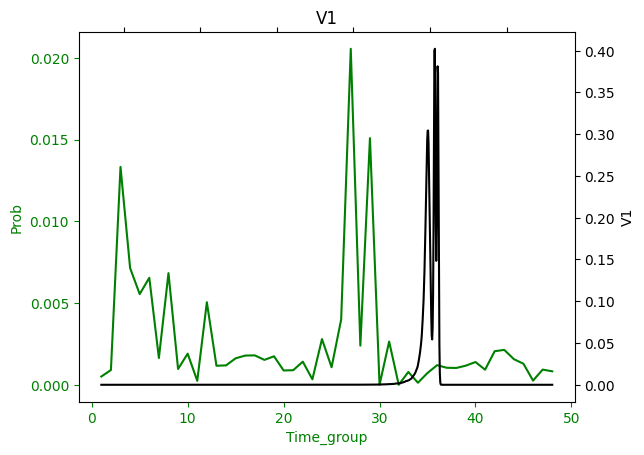

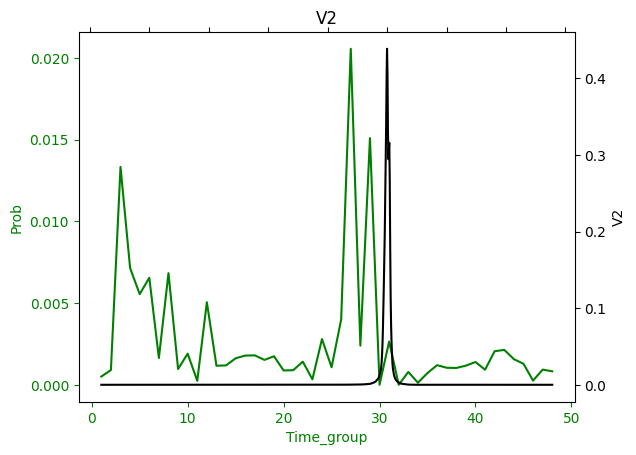

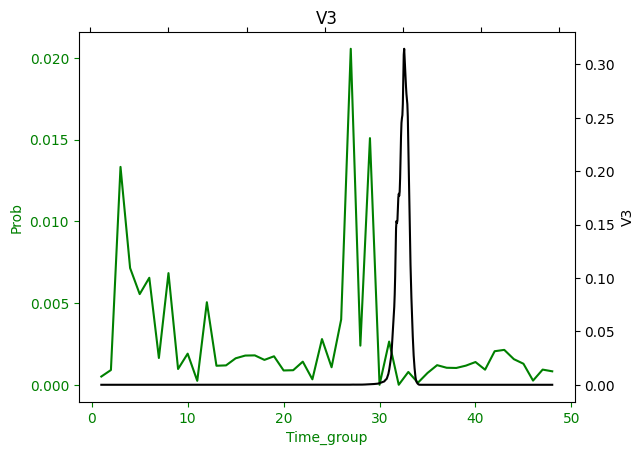

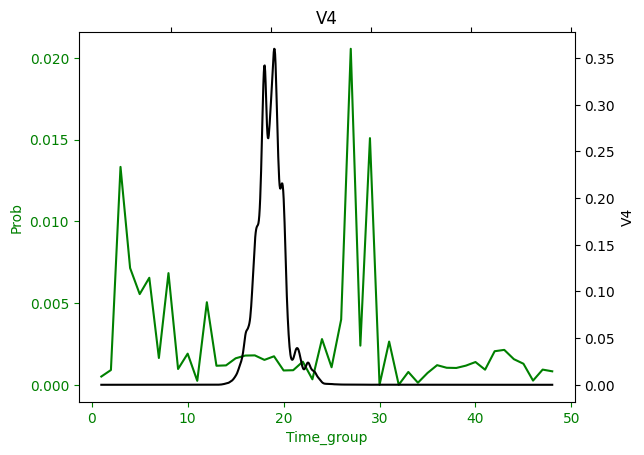

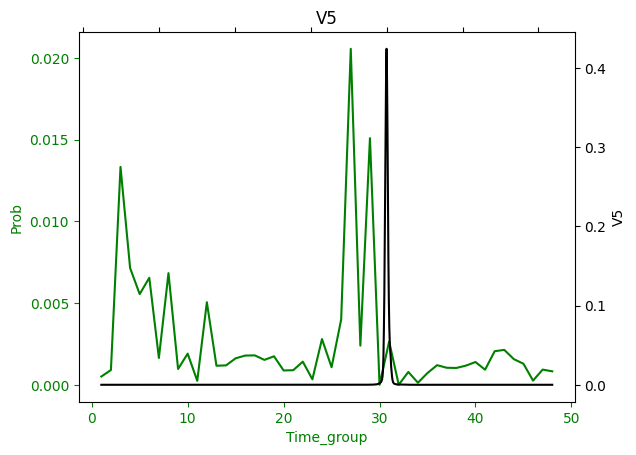

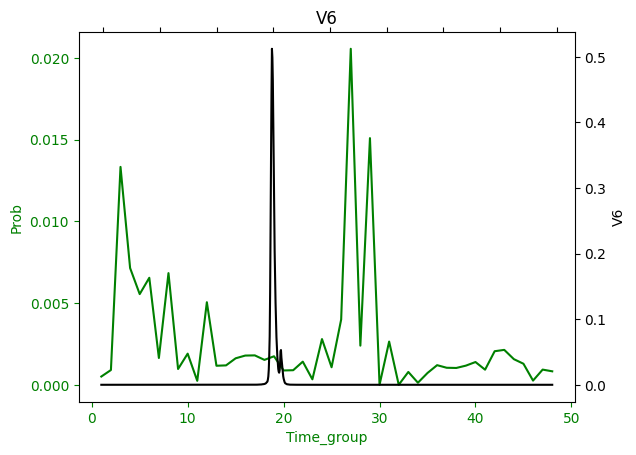

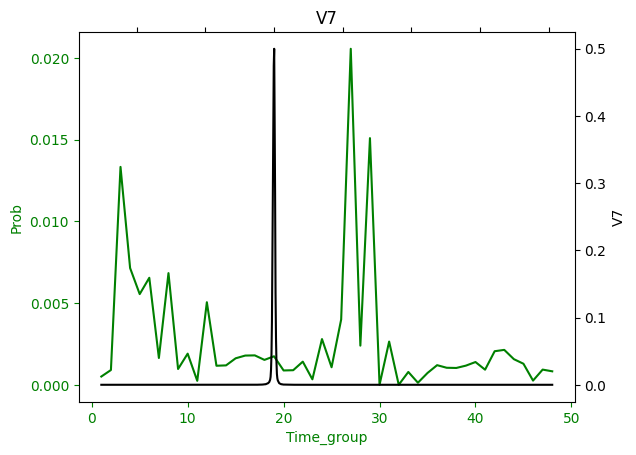

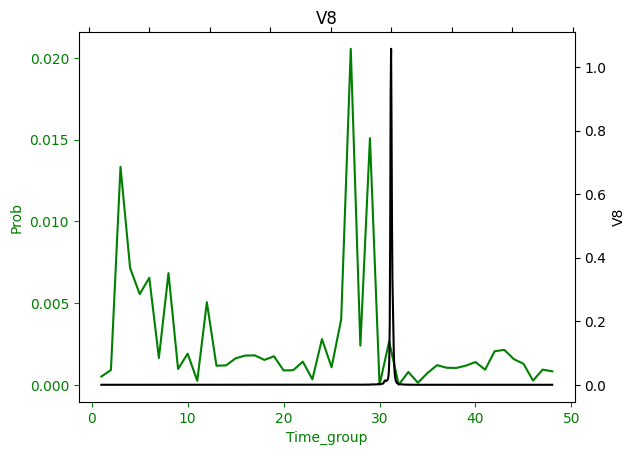

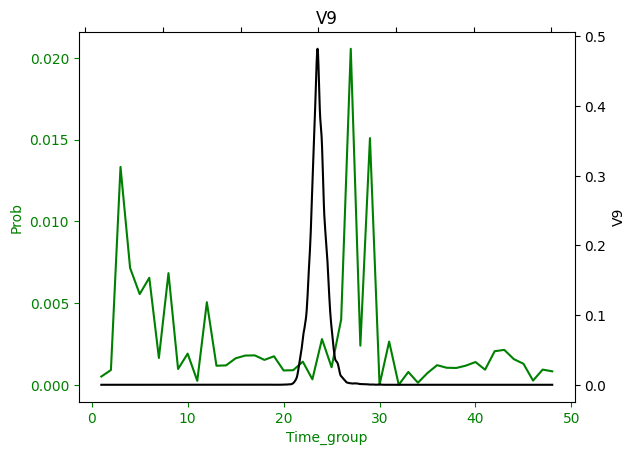

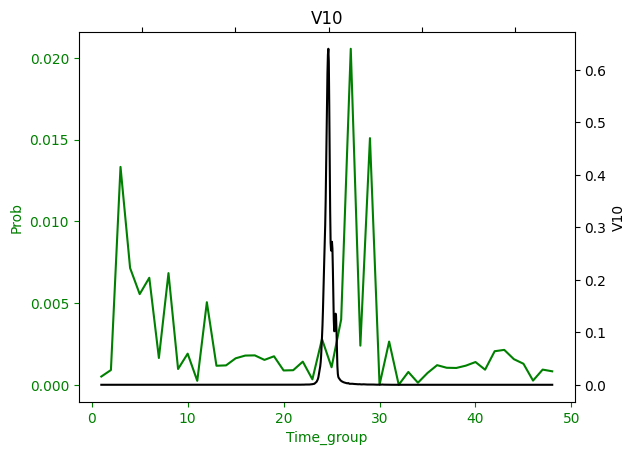

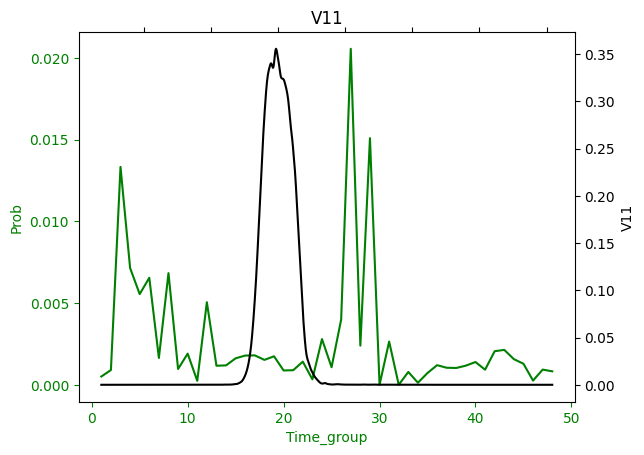

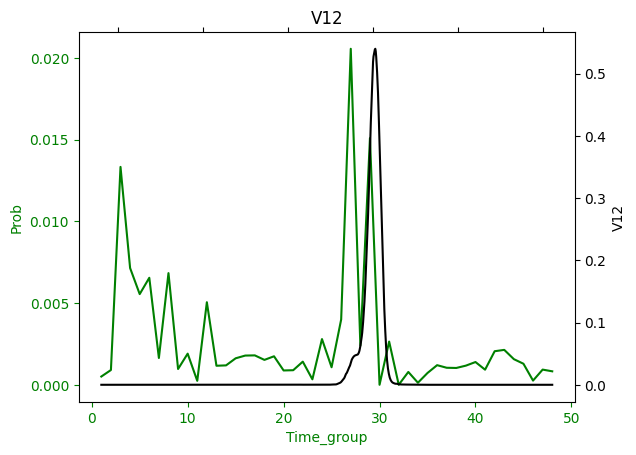

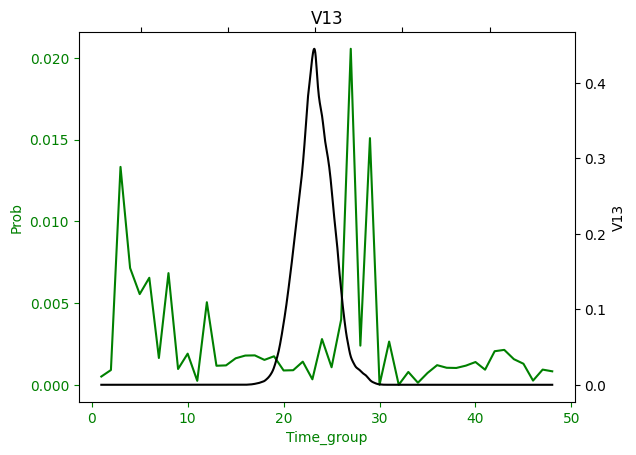

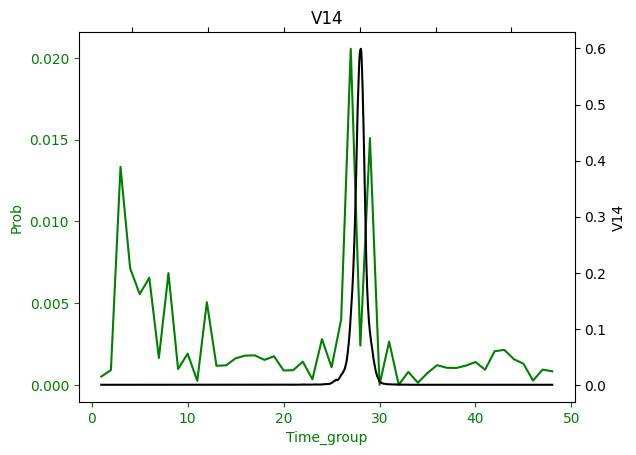

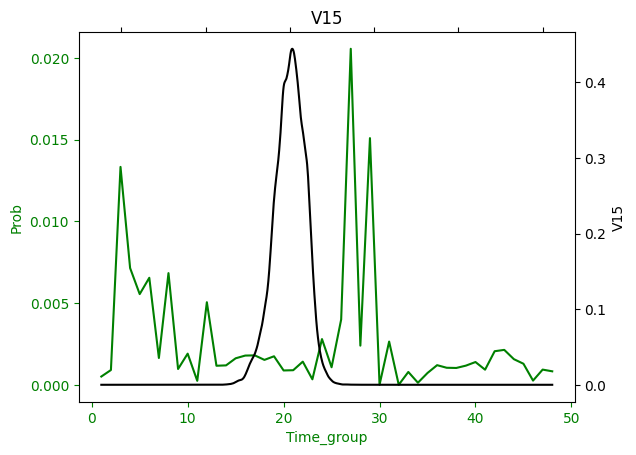

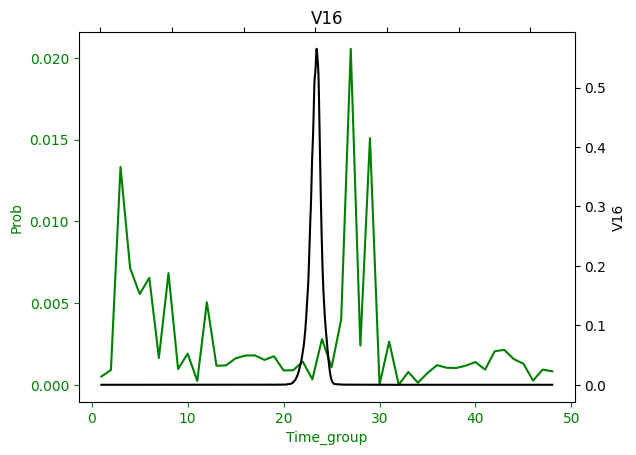

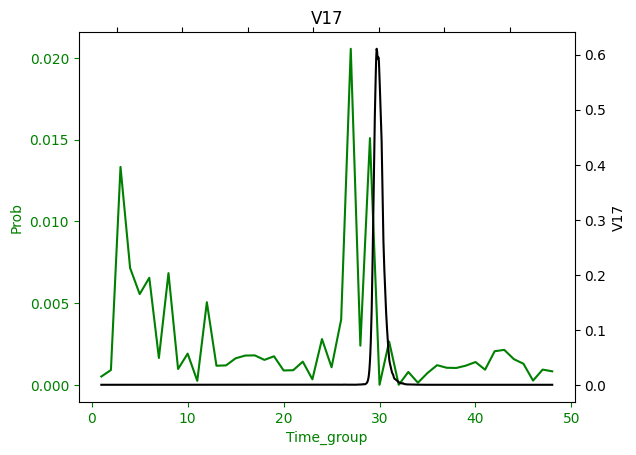

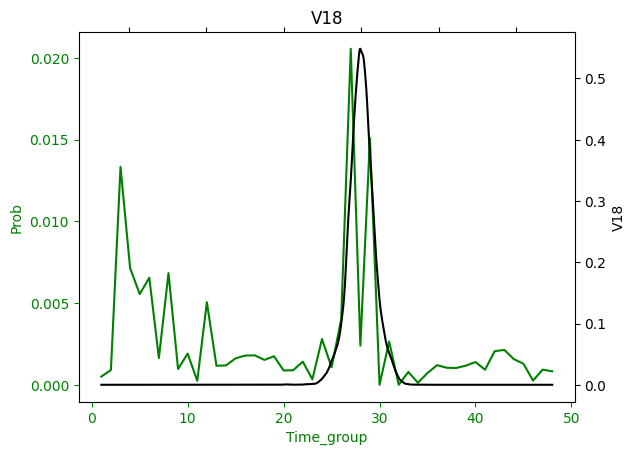

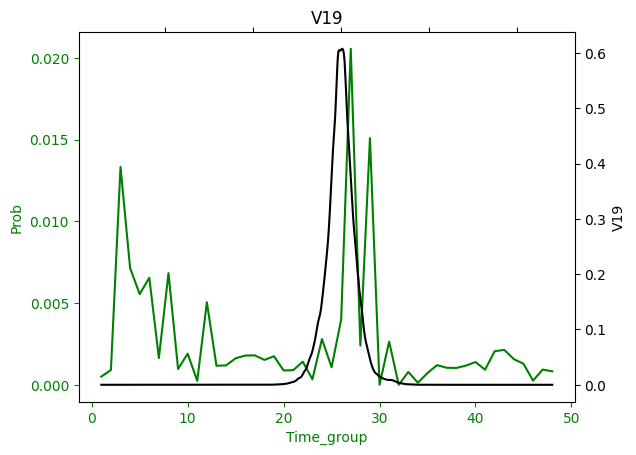

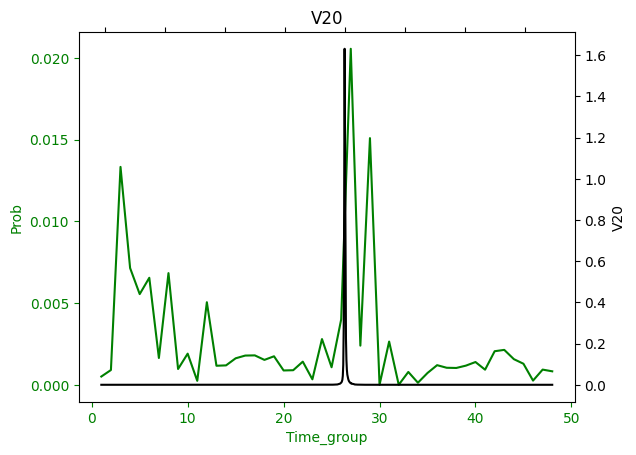

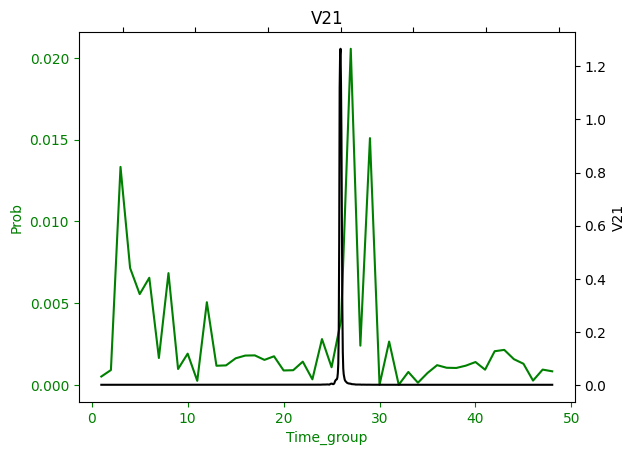

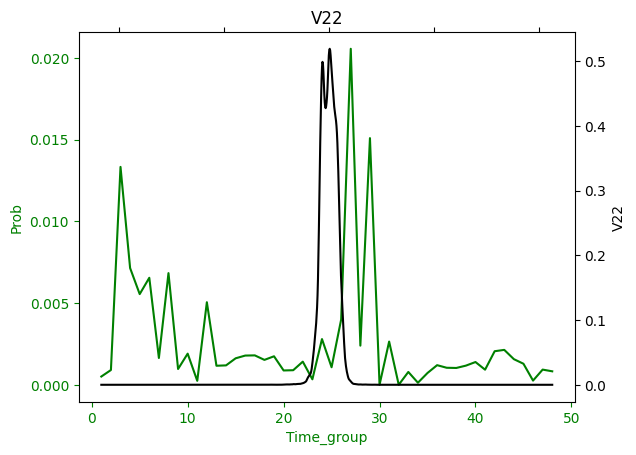

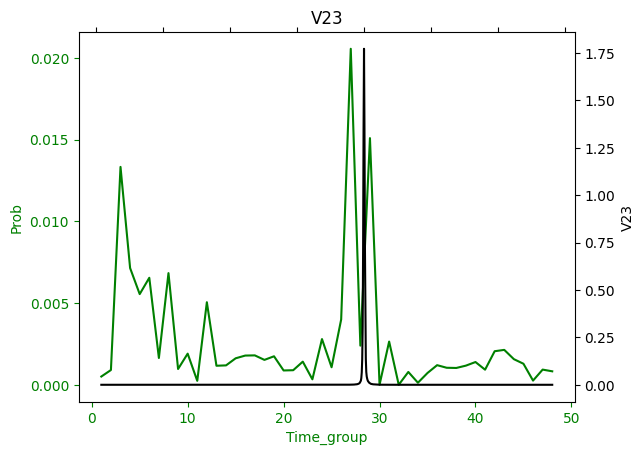

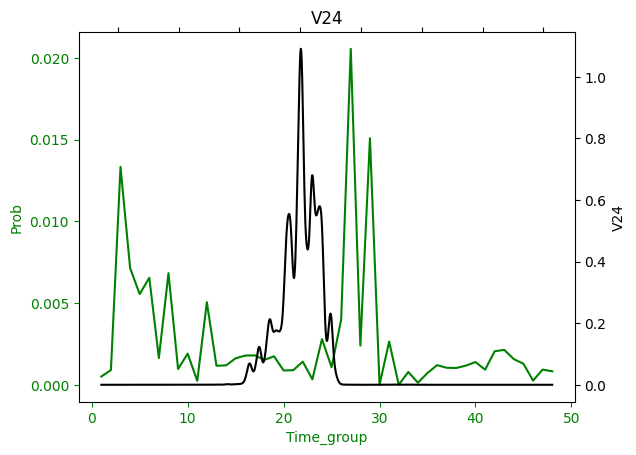

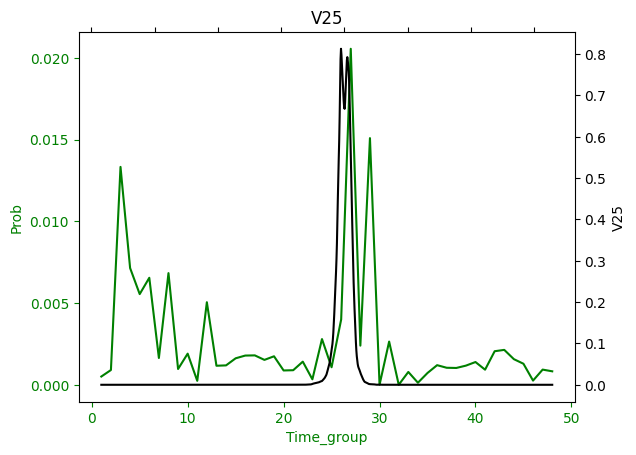

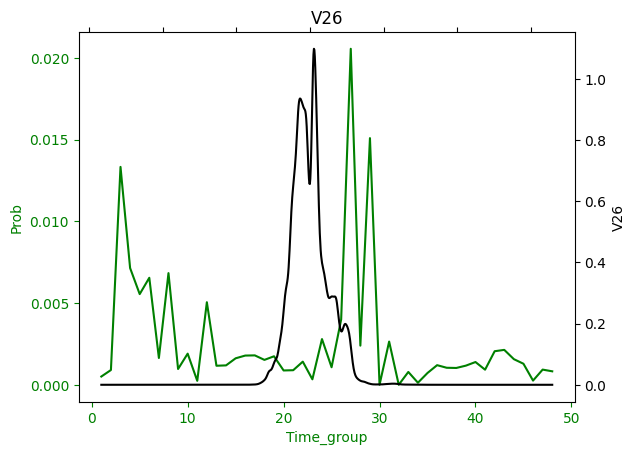

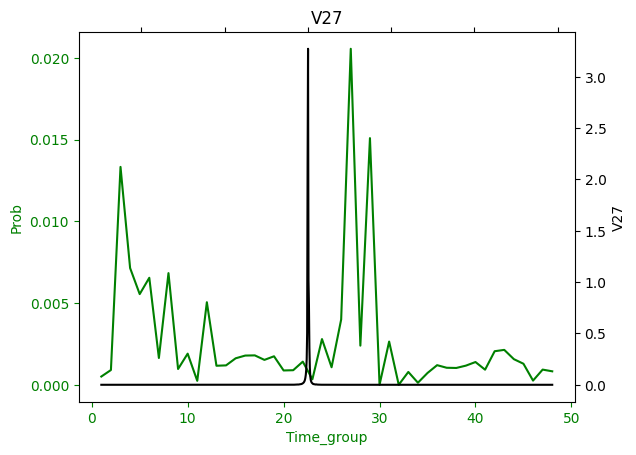

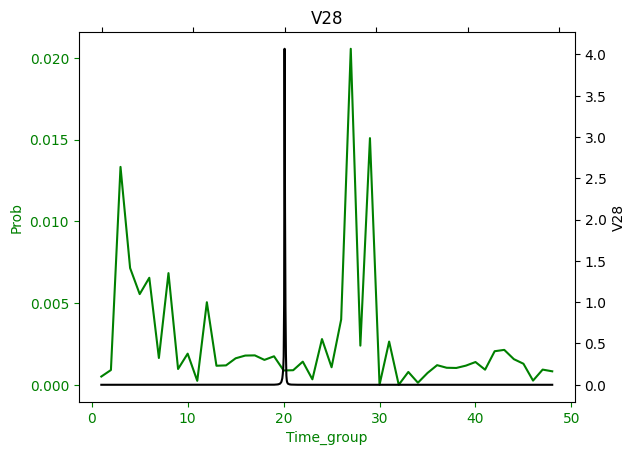

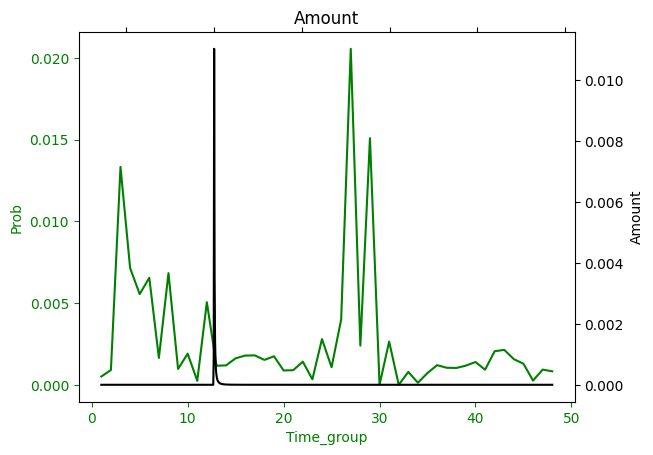

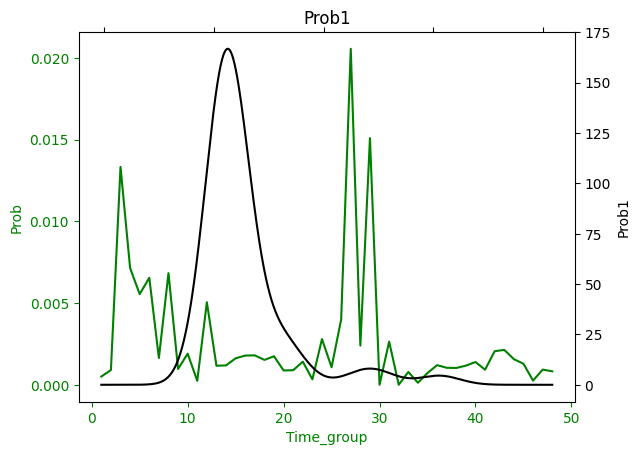

In [189]:
for col in col_list.drop(["Time","Class","Time_group"]):
    fig=plt.figure()
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)
    ax.set_title(col)
    ax.plot(range(1,49),df.groupby('Time_group')['Class'].mean(), color="g")
    ax.set_xlabel("Time_group", color="g")
    ax.set_ylabel("Prob", color="g")
    ax.tick_params(axis='x', colors="g")
    ax.tick_params(axis='y', colors="g")

    ax2 = df[col].plot(kind = "kde", color = 'k')
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    #ax2.set_xlabel('Time', color="k") 
    ax2.set_ylabel(col, color="k")       
    #ax2.xaxis.set_label_position('top') 
    ax2.axes.xaxis.set_ticklabels([])  
    ax2.yaxis.set_label_position('right') 
    #ax2.tick_params(axis='x', colors="k")
    ax2.tick_params(axis='y', colors="k")

plt.show()

<Axes: xlabel='Time', ylabel='Density'>

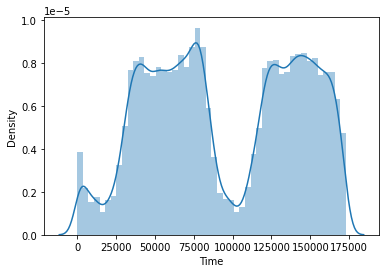

In [143]:
sns.distplot(df['Time'][df.Class == 0], bins = 48)

클래스 0, 1에 따라 유의미한 차이가 존재함.

<Axes: xlabel='Time'>

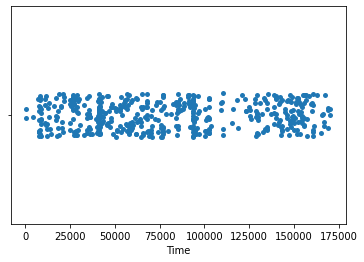

In [144]:
sns.stripplot(x = df['Time'][df.Class == 1], jitter = .1)

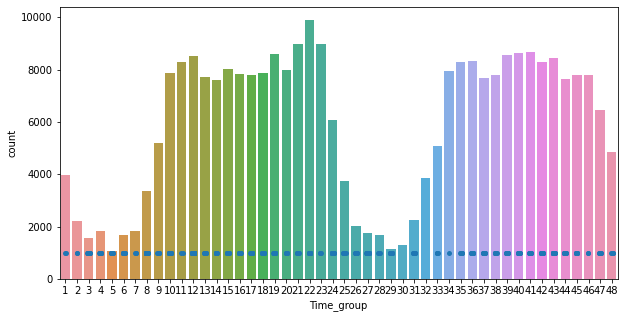

In [146]:
# 그래프 겹치기 시도(미완성)

fig, ax = plt.subplots(1, 1, figsize = (10, 5))

sns.countplot(x = df['Time_group'], ax = ax)
sns.stripplot(x = df['Time_group'][df.Class == 1], y = df['Class']*1000, jitter = .1, orient = 'v', ax = ax)
# sns.rugplot(data = df, x = 'Time')

plt.show()

## Amount 변수 특징 탐색

<Axes: xlabel='Amount', ylabel='Density'>

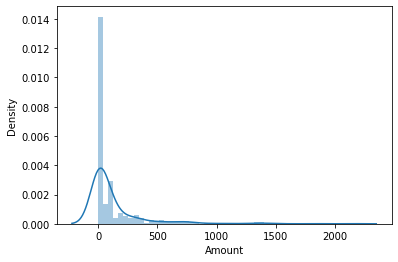

In [ ]:
sns.distplot(df['Amount'][df.Class == 1], bins = 50)

<Axes: xlabel='Amount', ylabel='Density'>

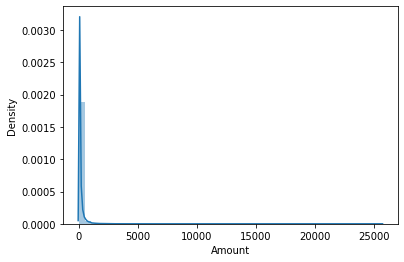

In [ ]:
sns.distplot(df['Amount'][df.Class == 0], bins = 50)

클래스 0, 1에 따라 유의미한 차이가 존재함.

## Amount 변수 로그변환 + winsorization + 표준화 scaling

<Axes: >

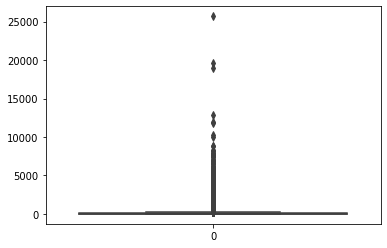

In [ ]:
sns.boxplot(df['Amount'])

<Axes: >

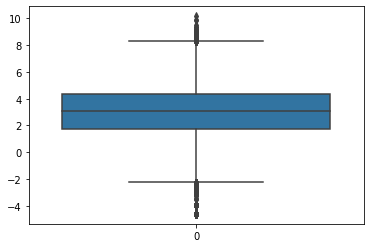

In [ ]:
sns.boxplot(np.log(df['Amount']))

In [ ]:
df['Amount'] = np.log(df['Amount'])

<Axes: >

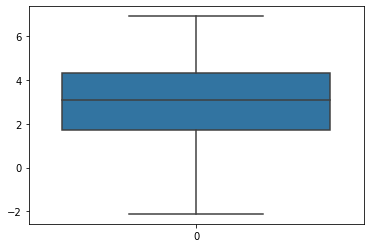

In [ ]:
# Set the percentage of winsorization, e.g. 1% on each end
pct = 0.01

# Use the winsorize function to winsorize the data
sns.boxplot(winsorize(df['Amount'], limits=(pct, pct)))

In [ ]:
df['Amount'] = winsorize(df['Amount'], limits=(pct, pct))

In [ ]:
# Assuming `df` is a pandas dataframe and `Amount` is a column in the dataframe
amount_data = df['Amount'].values.reshape(-1, 1)

# Create a StandardScaler object and use it to standardize the data
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(amount_data)

# v1 ~ v28 변수 결측치 이상치 확인

In [ ]:
# check for null values
df.isnull().sum()

Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
Time_group    0
dtype: int64

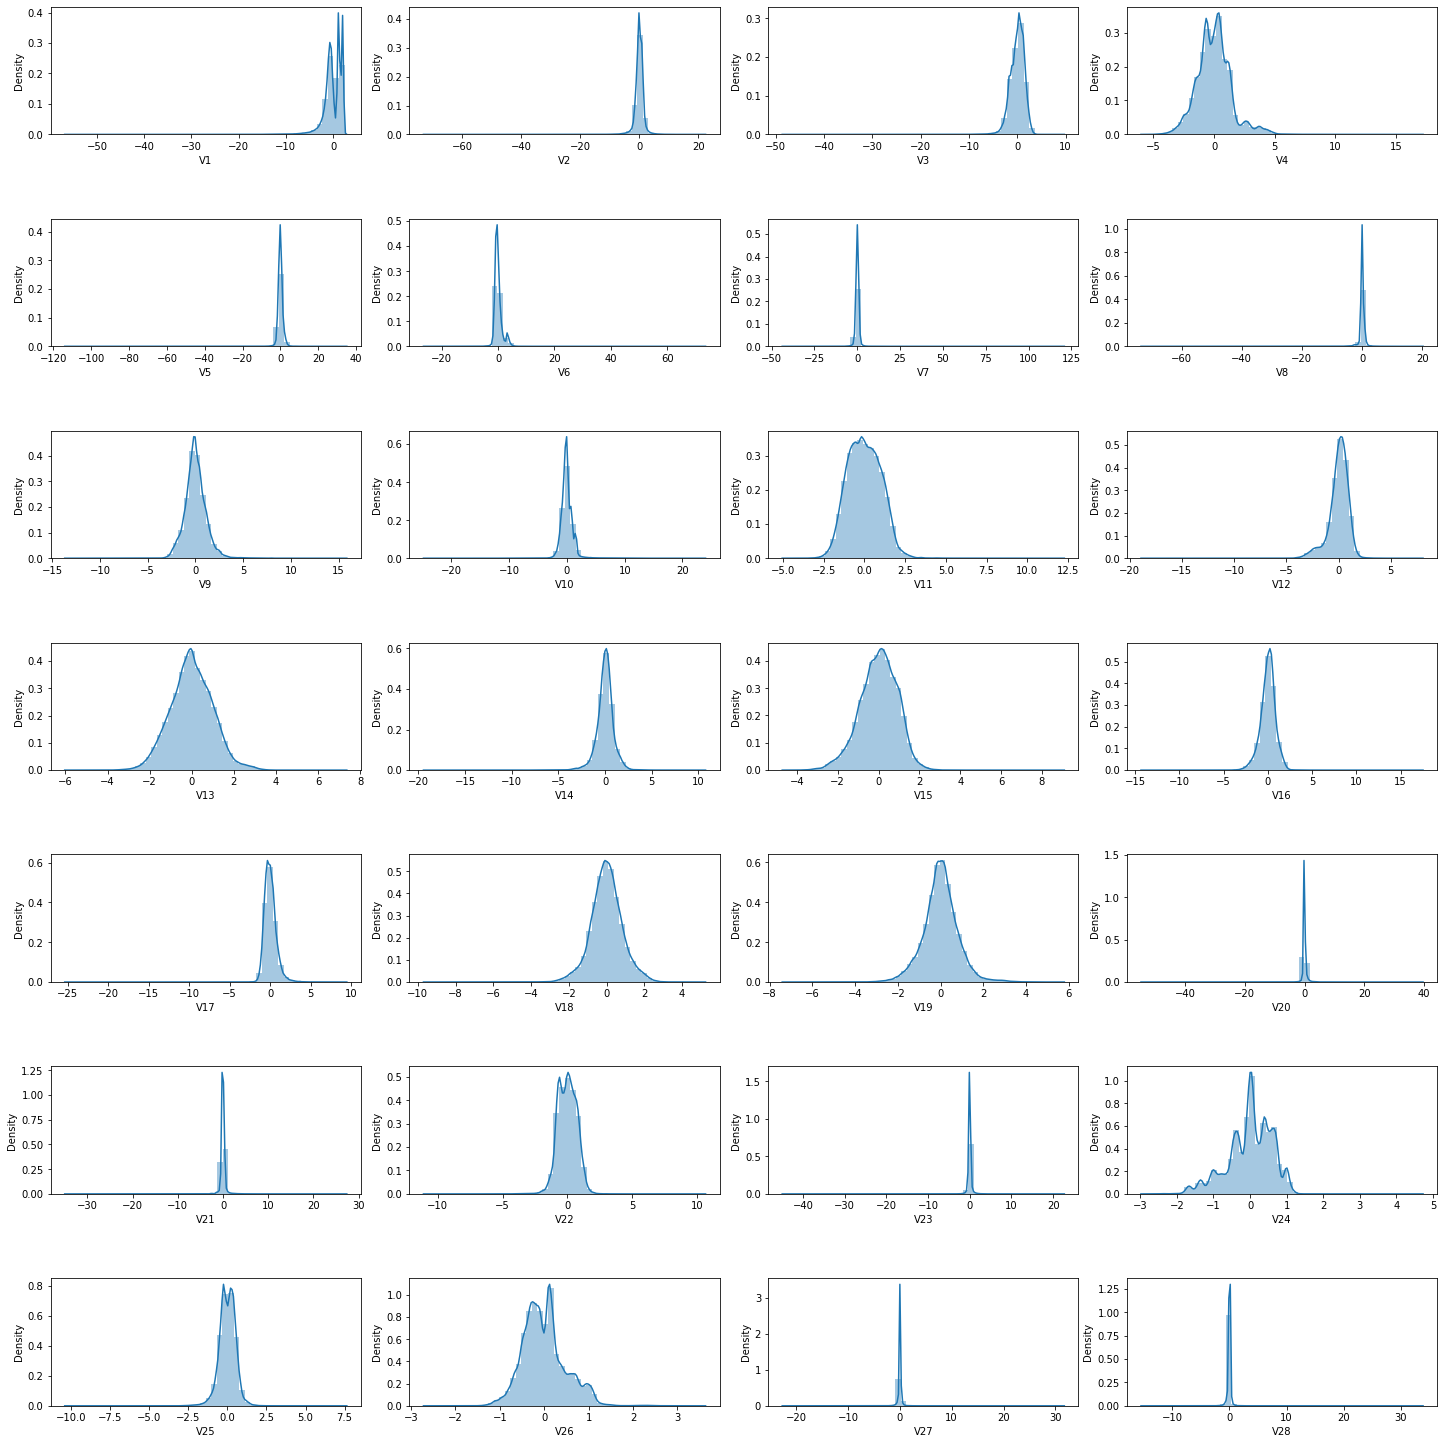

In [ ]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class', 'Time_group'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

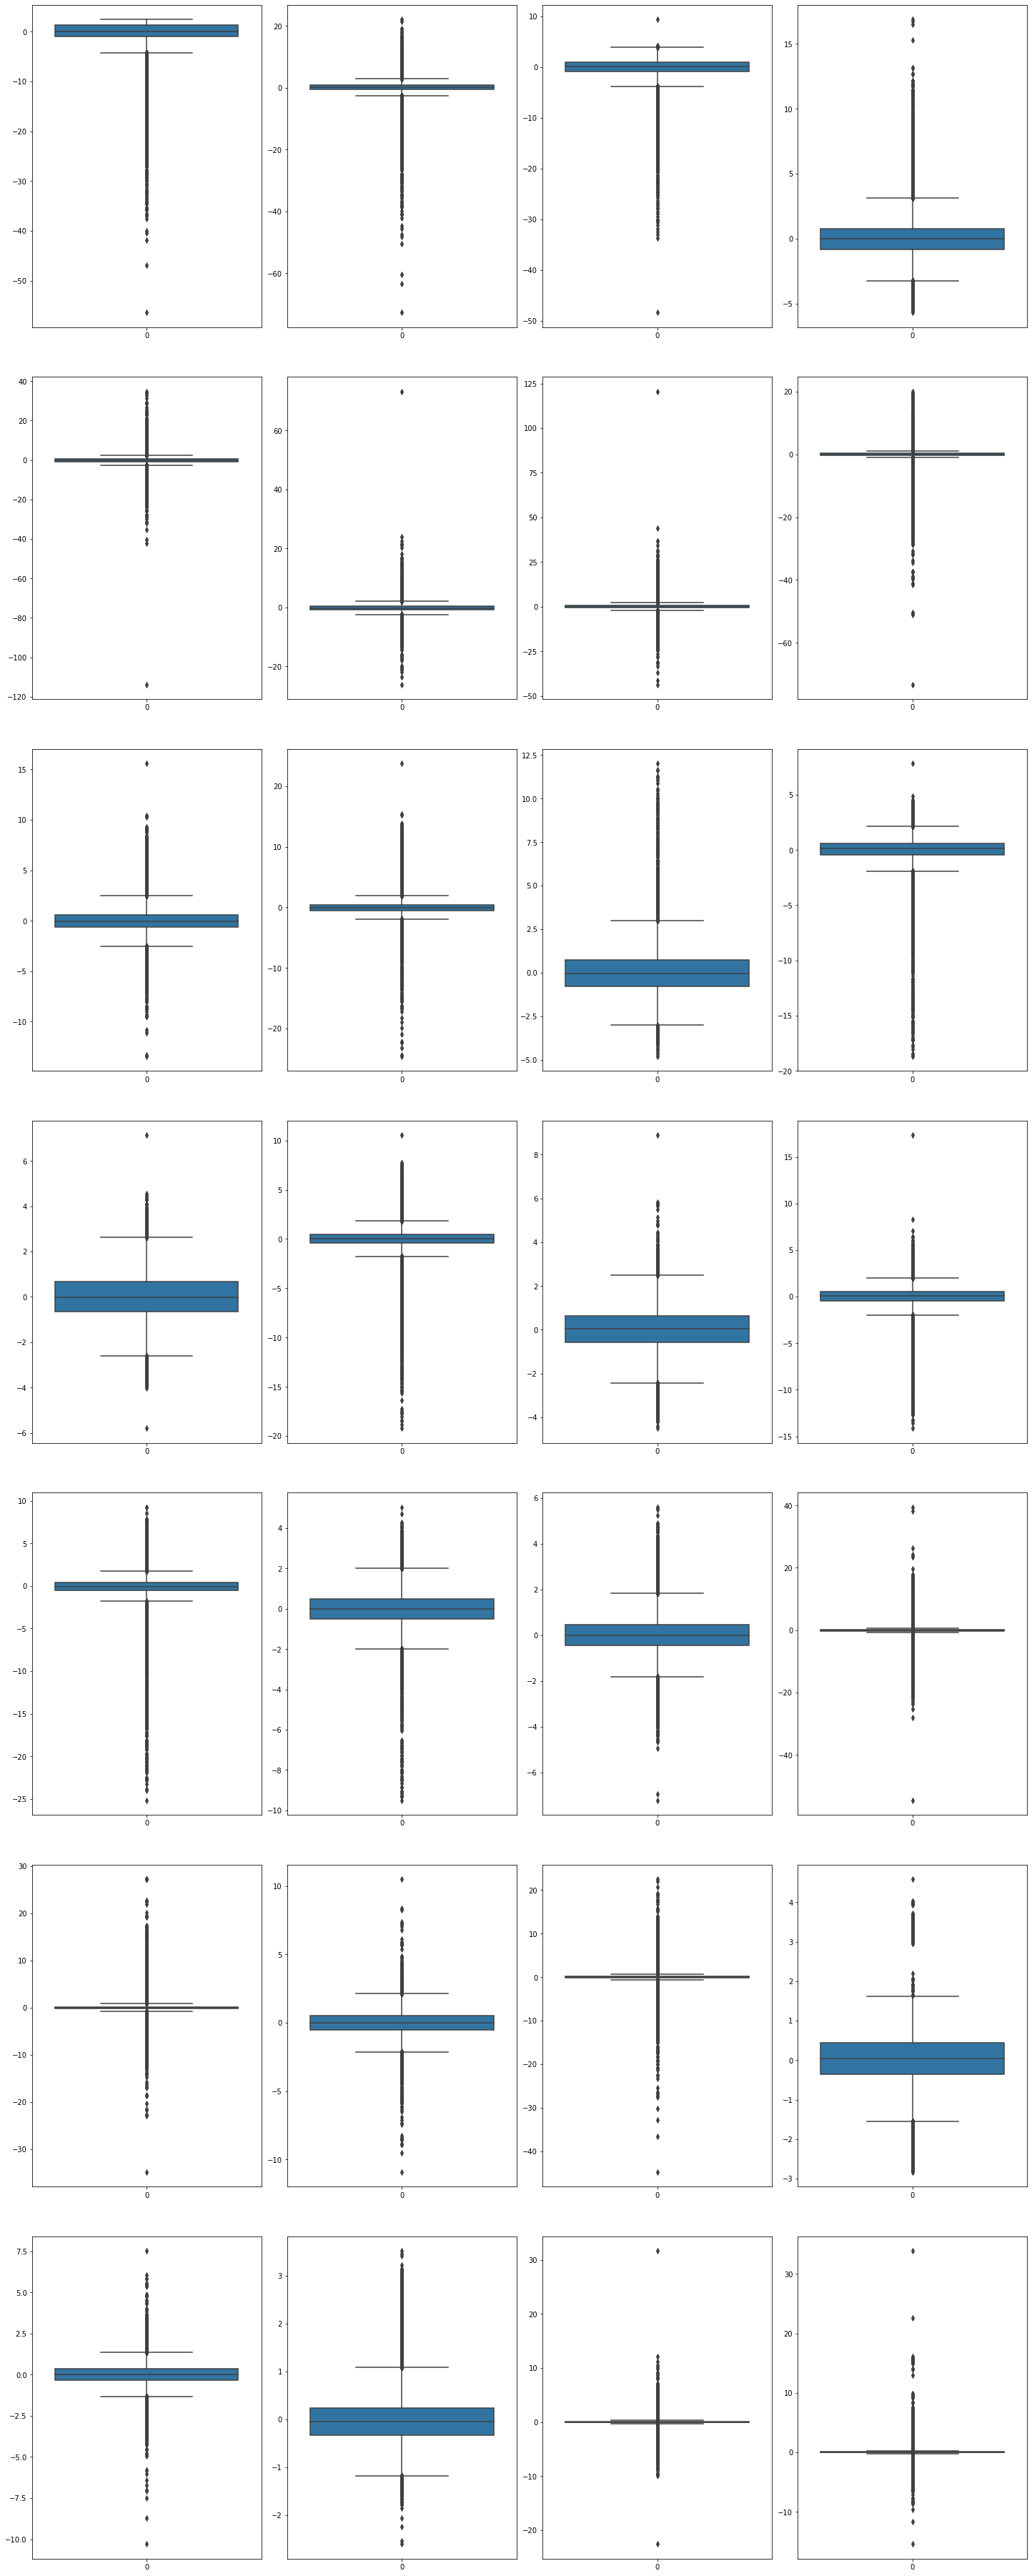

In [ ]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class', 'Time_group'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.boxplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

## v1 ~ v28까지 winsorization 적용

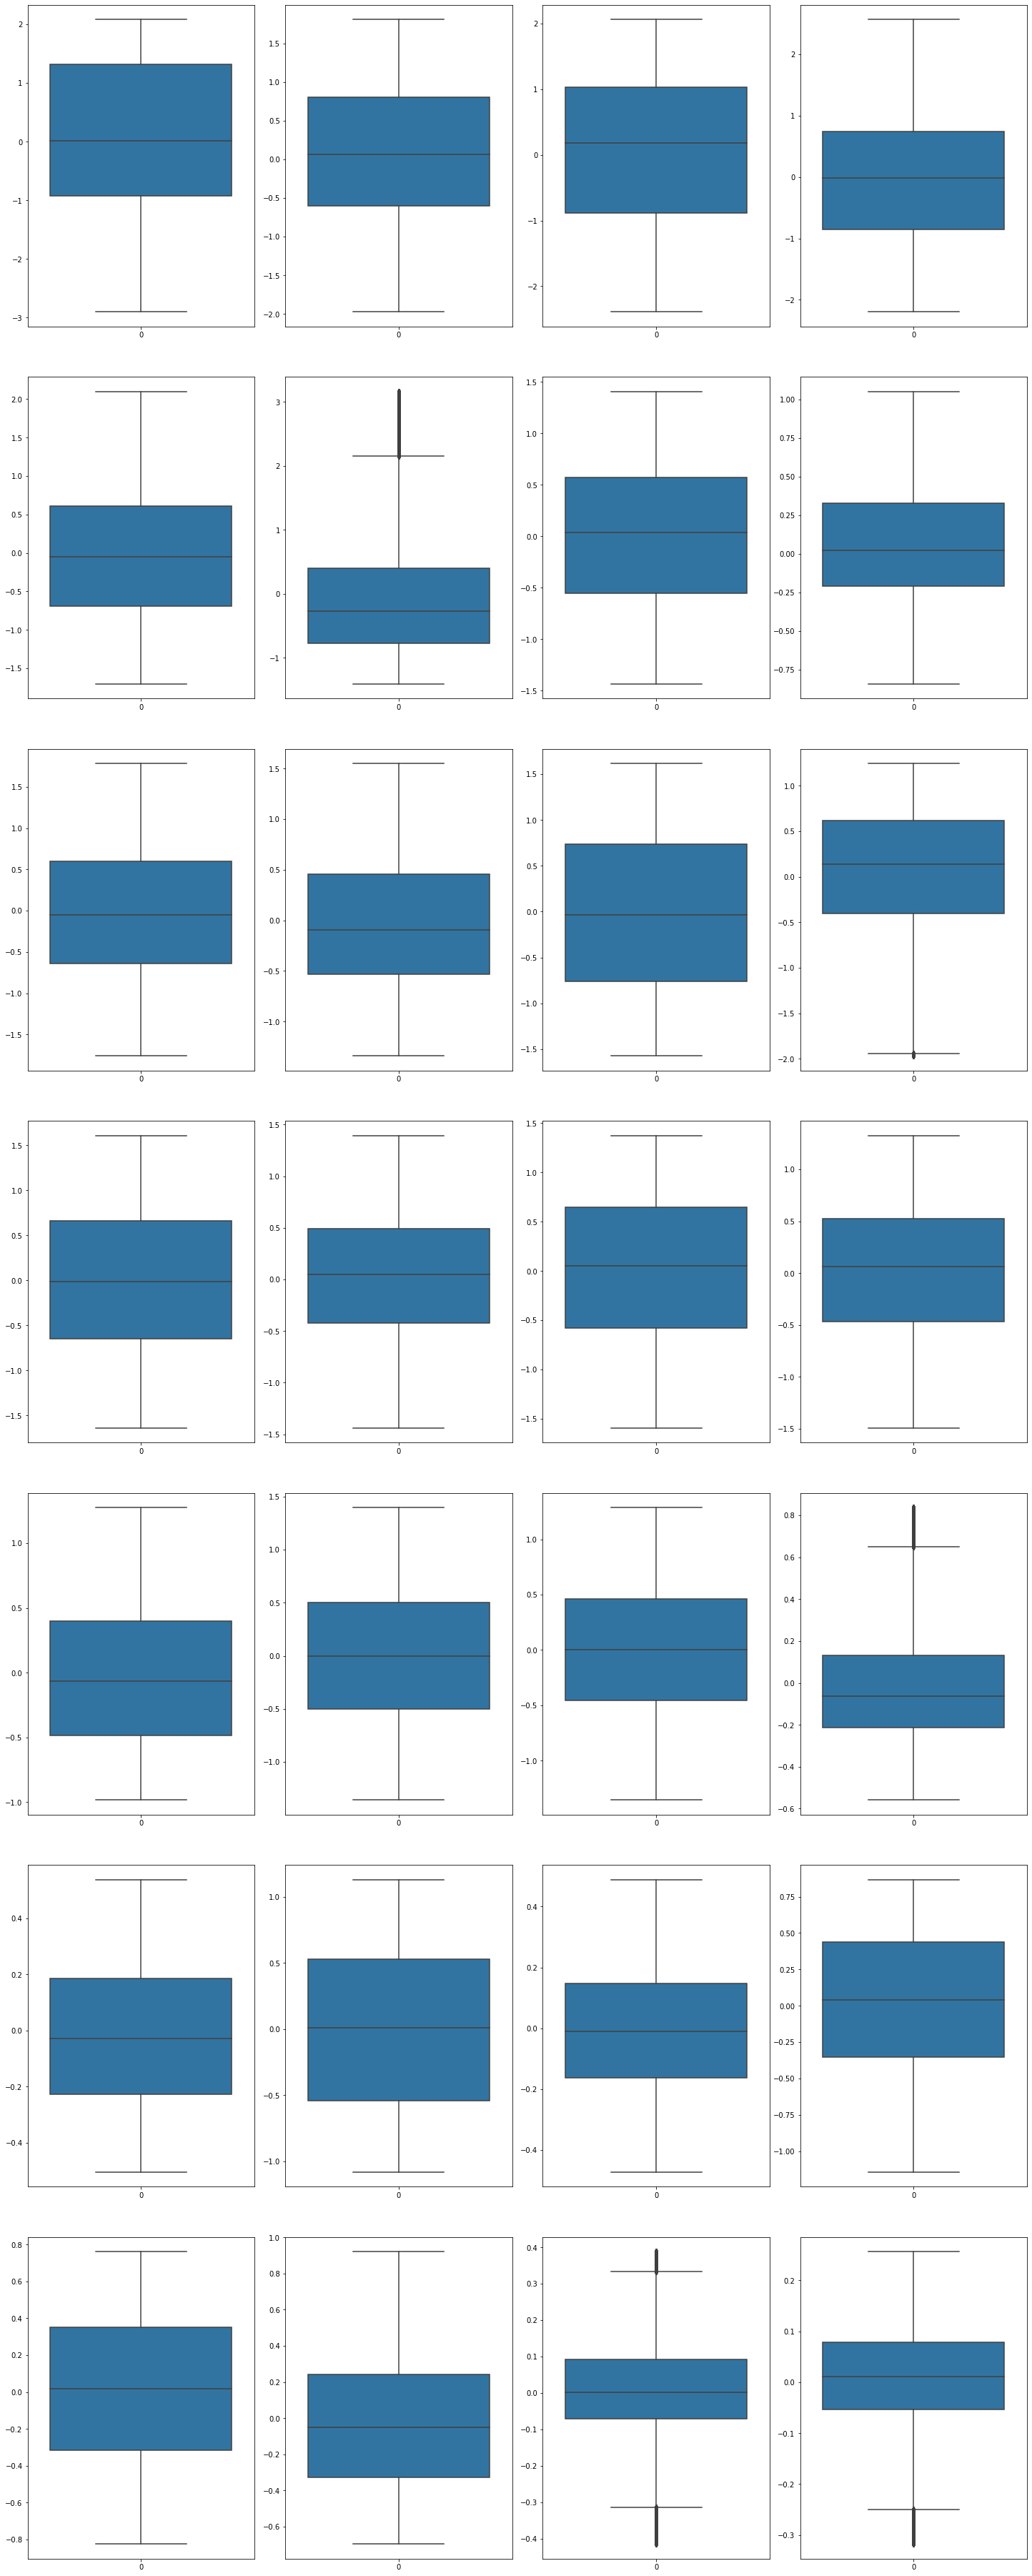

In [ ]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class', 'Time_group'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

pct2 = 0.05

for col in df_temp.columns:
    sns.boxplot(winsorize(df_temp[col], limits=(pct2, pct2)), ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

In [ ]:
df_temp.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [ ]:
for col in df_temp.columns:
    df[col] = winsorize(df_temp[col], limits=(pct2, pct2))

# LASSO로 변수 거르기

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

# train , validation, test ratio is set to be 6:2:2
train, test = train_test_split(df, test_size = 0.4, random_state = 111)
validation, test = train_test_split(test, test_size = 0.5, random_state = 132)

# input split
X       = df.drop(['Class'], axis = 1)
X_train = train.drop(['Class'], axis = 1)
X_val   = validation.drop(['Class'], axis = 1)
X_test   = test.drop(['Class'], axis = 1)

y       = df['Class']
y_train = train['Class']
y_val   = validation['Class']
y_test  = test['Class']

In [ ]:
# standard scaling

# sc = StandardScaler()
# x = sc.fit_transform(X)
# x_train = sc.fit_transform(X_train)
# x_val = sc.fit_transform(X_val)
# x_test = sc.fit_transform(X_test)

In [ ]:
#logit = LogisticRegression(fit_intercept= True, penalty = 'none', solver = 'newton-cg')
lasso = LogisticRegression(fit_intercept= True,  penalty='l1', solver='liblinear', C = 1.0) # LASSO regression

lasso.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
lasso.coef_.shape

(1, 31)

In [ ]:
col_names = X_train.columns
lasso_coef = pd.DataFrame(lasso.coef_, columns = col_names).T
lasso_coef

,0
Time,-0.000026
V1,-0.019863
V2,-0.168687
V3,-0.390807
V4,1.107863
V5,0.000633
V6,-0.142294
V7,-0.727955
V8,-1.226962
V9,-0.330705


In [ ]:
lasso_coef.sort_values(by=0)

,0
V14,-1.337865
V8,-1.226962
V12,-1.034133
V16,-0.742383
V7,-0.727955
V10,-0.595977
V17,-0.485952
V3,-0.390807
V9,-0.330705
V15,-0.249522


Text(0, 0.5, 'Column list')

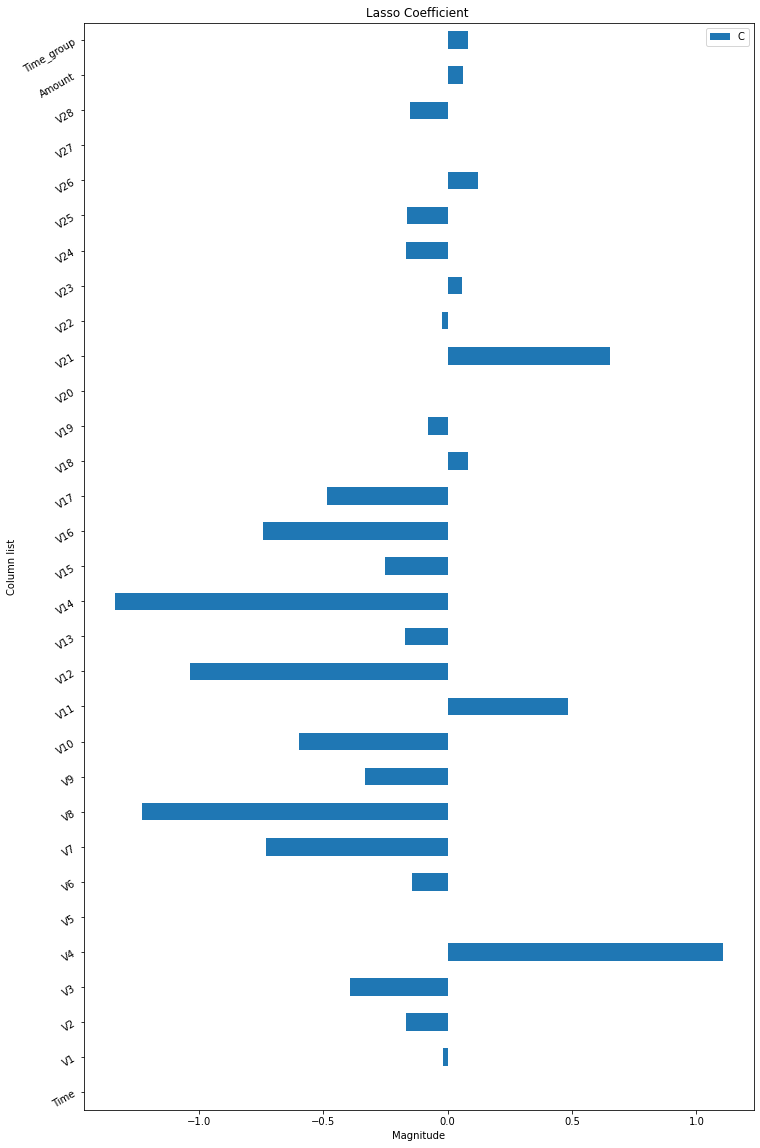

In [ ]:
ax = lasso_coef.plot(kind = 'barh', rot = 30, figsize = (12,20)) 

ax.legend("Coefficient")
ax.set_title("Lasso Coefficient ")
ax.set_xlabel("Magnitude")
ax.set_ylabel("Column list")